In [1]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        q_value = self.q_values[state][action]
        next_q_value = self.q_values[next_state][next_action]
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] += self.alpha * td_error

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            return np.argmax(self.q_values[state])
        return action

In [3]:
from utils import gen_wrapped_env, show_video

In [4]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
agent = SARSA(actions=3, agent_indicator=10)  # 상하좌우 4개 액션만 정의

rewards = []
success = 0
episodes = 100000

for ep in range(episodes):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0
episode: 720, rewards: 0
episode: 740, rewards: 0
episode: 760, rewards: 0
episode: 780, rewards: 0
episode: 800, rewards: 0
epis

In [5]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{12: [0.05124, 0.05107, 0.05868],
 0: [0.02897, 0.02879, 0.03407],
 3: [0.02609, 0.02622, 0.03013],
 24: [0.07042, 0.06989, 0.08679],
 6: [0.0292, 0.02913, 0.03486],
 15: [0.08707, 0.08692, 0.0952],
 27: [0.18356, 0.18399, 0.19271],
 18: [0.11286, 0.11284, 0.1304],
 21: [0.14655, 0.14713, 0.16471],
 9: [0.0344, 0.03433, 0.03558],
 30: [0.24326, 0.24353, 0.27045],
 36: [0.09091, 0.091, 0.1086],
 39: [0.34417, 0.34416, 0.39581],
 42: [0.48147, 0.479, 0.54663],
 33: [0.29086, 0.29078, 0.34138],
 45: [0.0, 0.0, 0.0]}

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_policy_heatmap_save(q_values, grid_size=(6, 6), save_path="policy_heatmap.jpg", dpi=300):
    policy_grid = np.full(grid_size, -1)

    for state, q in q_values.items():
        y, x = divmod(state, grid_size[1])
        if 0 <= x < grid_size[1] and 0 <= y < grid_size[0]:
            policy_grid[y, x] = np.argmax(q)

    action_text = {
        0: 'L',
        1: 'R',
        2: 'F',
        -1: '.'
    }

    fig, ax = plt.subplots(figsize=(6, 6))  # 명시적으로 크기 설정
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            action = policy_grid[i, j]
            symbol = action_text.get(action, '.')
            ax.text(j, i, symbol, ha='center', va='center', fontsize=20)

    ax.set_xticks(np.arange(grid_size[1]))
    ax.set_yticks(np.arange(grid_size[0]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.grid(True)
    ax.set_title("Policy Heatmap (F:Forward, L:Left, R:Right)")
    plt.gca().invert_yaxis()

    # 저장
    full_path = os.path.abspath(save_path)
    plt.savefig(full_path, format='jpg', dpi=dpi, bbox_inches='tight')
    plt.close()
    print(f"✅ Heatmap saved to: {full_path}")



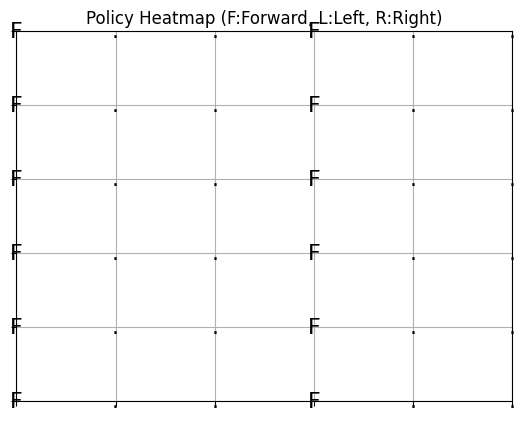

In [54]:
plot_policy_heatmap(agent.q_values, grid_size=(6, 6))

In [ ]:
show_video()

In [34]:
for s, q in agent.q_values.items():
    print(f"{s}: {np.round(q, 2)} → {np.argmax(q)}")


12: [0.05 0.05 0.06] → 2
0: [0.03 0.03 0.03] → 2
3: [0.03 0.03 0.03] → 2
24: [0.07 0.07 0.09] → 2
6: [0.03 0.03 0.03] → 2
15: [0.09 0.09 0.1 ] → 2
27: [0.18 0.18 0.19] → 2
18: [0.11 0.11 0.13] → 2
21: [0.15 0.15 0.16] → 2
9: [0.03 0.03 0.04] → 2
30: [0.24 0.24 0.27] → 2
36: [0.09 0.09 0.11] → 2
39: [0.34 0.34 0.4 ] → 2
42: [0.48 0.48 0.55] → 2
33: [0.29 0.29 0.34] → 2
45: [0. 0. 0.] → 0


In [ ]:
# === Policy Heatmap 시각화 셀 ===
import numpy as np
import matplotlib.pyplot as plt

# Grid 크기 설정 (6x6)
grid_size = 6
policy_grid = np.full((grid_size, grid_size), '', dtype=object)

# 행동 → 문자열 라벨
action_label = {
    0: 'L',  # 좌회전
    1: 'R',  # 우회전
    2: 'F',  # 전진
}

# 상태번호 → (row, col) 좌표 변환
def state_to_coord(s, width=6):
    return divmod(s, width)

# Q-table 기반 policy 추출
for s, q_values in agent.q_values.items():
    best_action = int(np.argmax(q_values))
    y, x = state_to_coord(s)
    policy_grid[y, x] = action_label[best_action]

# 히트맵 시각화
fig, ax = plt.subplots()
ax.set_title("Policy Heatmap (L=좌회전, R=우회전, F=전진)")
table = ax.table(cellText=policy_grid, loc='center', cellLoc='center', edges='closed')
table.scale(1.2, 1.5)
ax.axis('off')
plt.show()


In [ ]:
import os
os.makedirs("./logs", exist_ok=True)

pd.Series(rewards).to_csv('./logs/rewards_sarsa_empty.csv')


In [ ]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa_empty.csv', index_col=False).iloc[:, 1]
# q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0])) + 1), label="SARSA")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("SARSA: Cumulative Reward")
plt.legend()
plt.grid(True)
plt.savefig("sarsa_empty.jpg", dpi=300, bbox_inches='tight')
plt.show() 
